# Hidden layers and hidden units
Picking the correct number of hidden layers and hidden units can  be important. When using too few nodes, the model won't be able to pick up all the signals, resulting in a low accuracy and poor predictive performance (underfitting).
<br>
Using too many nodes, the model will tend to overfit on the training data (see regularization for techniques to prevent overfitting) and won't be able to generalize well. Therefore, we always have to look at the performance on the validation data to find the right balance.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

SEED = 2017

Using TensorFlow backend.


### Load Data

In [2]:
data = pd.read_csv('data/winequality-red.csv', sep=';')
y = data['quality']
X = data.drop(['quality'], axis=1)

### Split Data into Test and Train sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Normalize the input data

In [4]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

### Define the model and optimizer and compile

In [5]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(1024, activation='relu')) 
model.add(Dense(1024, activation='relu')) 
model.add(Dense(1024, activation='relu')) 
# Output layer
model.add(Dense(1, activation='linear'))
# Set optimizer
opt = SGD(lr=0.01)
# Compile model
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

### Set the hyperparameters and train the model

In [6]:
n_epochs = 500
batch_size = 256

history = model.fit(X_train.values, y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2, verbose=0)

### Predict on the test set

In [7]:
predictions = model.predict(X_test.values)
print('Test accuracy: {:f>2}%'.format(np.round(np.sum([y_test==predictions.flatten().round()])/y_test.shape[0]*100, 2)))

Test accuracy: 64.38%


### Plot the training and validation accuracy

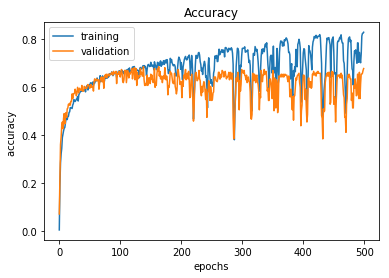

In [12]:
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()

We should focus on the validation accuracy and use early stopping to stop the training after around 450 epochs. This results in the highest validation accuracy.